In [17]:
import numpy as np  

In [18]:
import paddle
import matplotlib.pyplot as plt

In [19]:
# 设置数据读取器，API自动读取MNIST数据训练集
train_dataset = paddle.vision.datasets.MNIST(mode='train')
data = np.array(train_dataset[0][0])
label = np.array(train_dataset[0][1])

In [20]:
def showImage(data,label,flag=0):
    if flag==0:
        plt.figure(figsize=(2,2))
        plt.imshow(data, cmap=plt.cm.binary)
        plt.axis('on') # 关掉坐标轴为 off
        plt.title(f'original image : {label[0]}') # 图像题目
        plt.show()
        return data,label
    if flag:
        plt.figure(figsize=(2,2))
        plt.imshow(data, cmap=plt.cm.binary)
        plt.axis('on') # 关掉坐标轴为 off
        plt.title(f'encrypted image : {label[0]}\n method : {label[1]}') # 图像题目
        plt.show() 

In [21]:
class SaltAndPepperNoise:  
    def __init__(self, noise_ratio):  
        """  
        初始化椒盐噪声类  
        :param noise_ratio: 噪声比例，取值范围[0, 1]，表示噪声点占总像素点的比例  
        """  
        self.noise_ratio = noise_ratio  
  
    def add_noise(self, image ,label):  
        """  
        对图像数组添加椒盐噪声  
        :param image_array: 灰度图像的NumPy数组  
        :return: 添加噪声后的图像数组  
        """  
        # 获取图像尺寸  
        height, width = image.shape  
  
        # 计算噪声点的数量  
        num_noise = int(self.noise_ratio * height * width)  
  
        # 生成随机噪声点的坐标  
        coords = [np.random.randint(0, i - 1, num_noise) for i in (height, width)]  
        coords = np.array(list(zip(coords[0], coords[1])))  
  
        # 生成随机噪声值（0或255）  
        noise_values = np.random.choice([0, 255], size=num_noise, p=[self.noise_ratio, 1 - self.noise_ratio])  
  
        # 在随机位置添加噪声  
        image[coords[:, 0], coords[:, 1]] = noise_values  
        
        transformed_label = np.append(label,'Salt')
        
        return image,  transformed_label

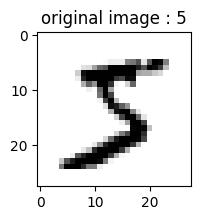

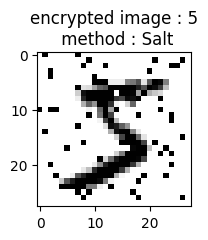

In [22]:
data,label = showImage(data,label)

noise_ratio = 0.1  # 设置噪声比例为10%  
salt = SaltAndPepperNoise(noise_ratio)
sap_noise,transformed_label = salt.add_noise(data,label)  

showImage(sap_noise,transformed_label,flag=1)

In [23]:
import random

# indexs = np.random.randint(0,60000,size=1000)
indexs = [i for i in range(1000)]

In [26]:
from PIL import Image  

def generate_encrypted_image(index):
    data ,label = np.array(train_dataset[index][0]),np.array(train_dataset[index][1])
    # 原始图像
    data,label = showImage(data,label)
      
    noise_ratio = 0.1  # 设置噪声比例为10%  
    salt = SaltAndPepperNoise(noise_ratio)
    sap_noise,transformed_label = salt.add_noise(data,label)  
    
    showImage(sap_noise,transformed_label,flag=1)
    
    transformed_image = Image.fromarray(sap_noise)  
    transformed_image.save(f'../data/salt_noise/{index}_{transformed_label[0]}_{transformed_label[1]}.png')

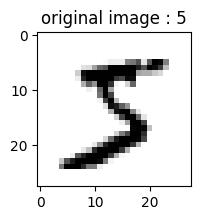

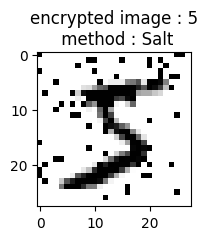

In [27]:
generate_encrypted_image(indexs[0])

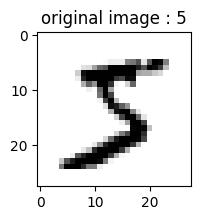

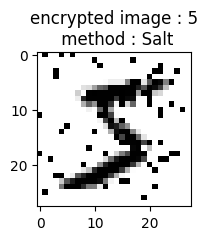

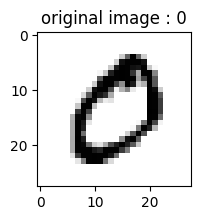

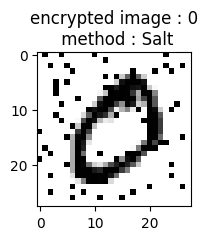

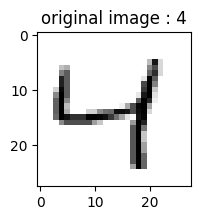

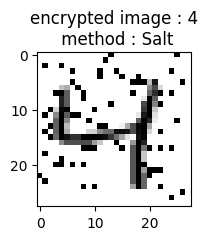

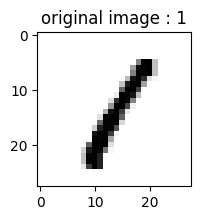

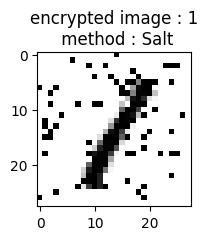

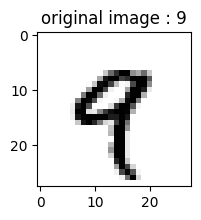

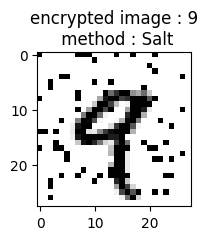

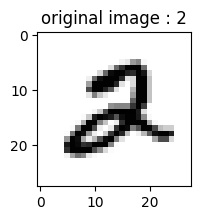

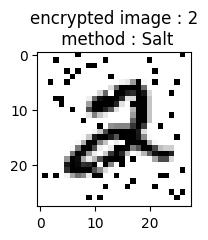

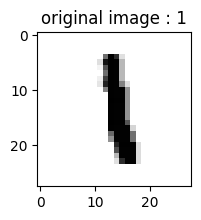

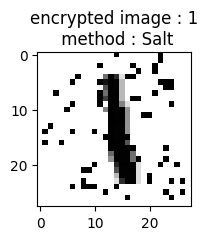

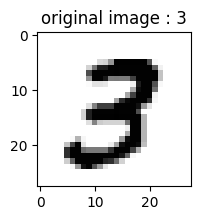

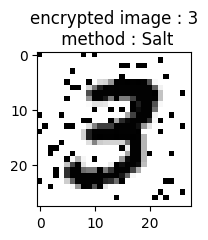

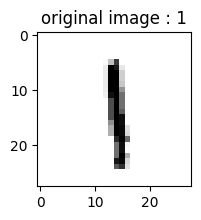

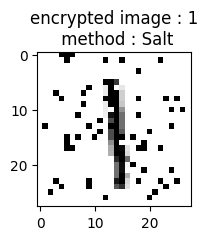

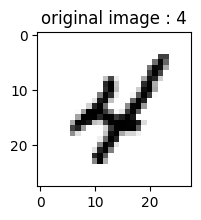

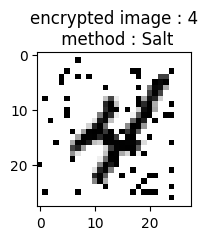

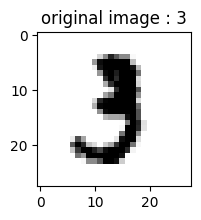

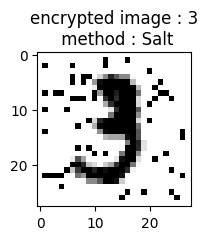

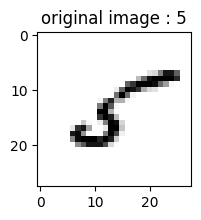

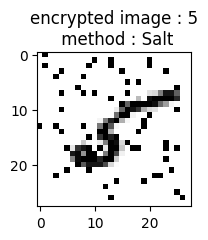

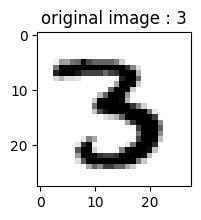

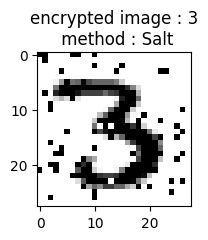

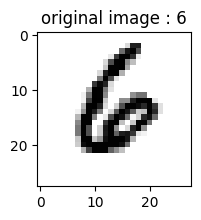

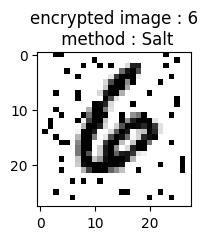

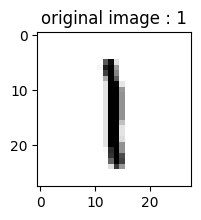

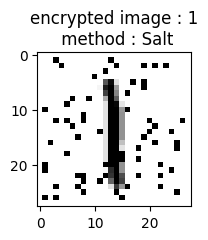

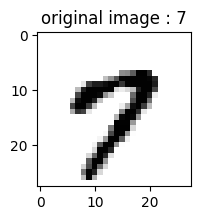

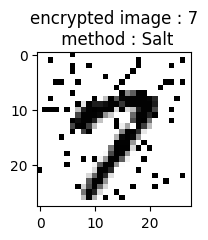

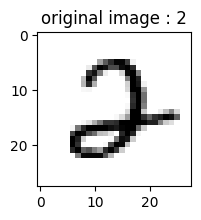

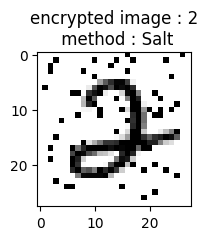

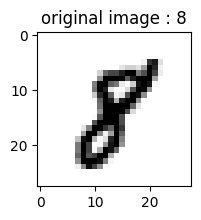

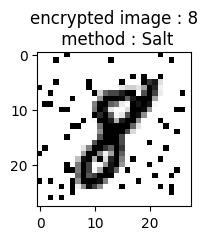

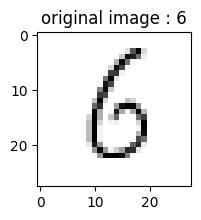

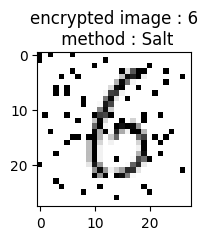

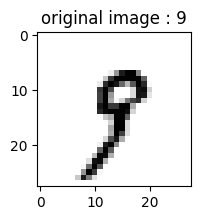

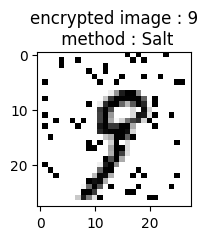

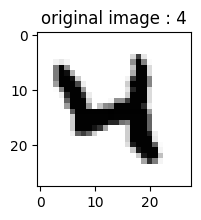

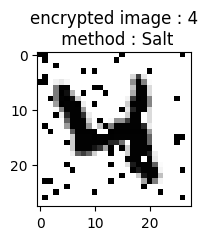

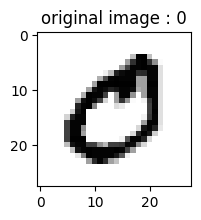

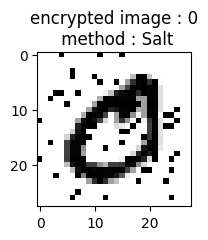

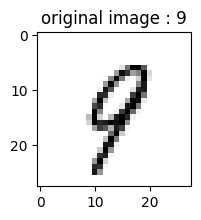

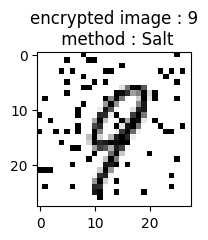

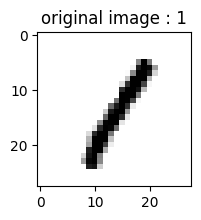

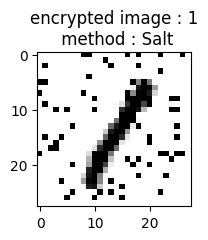

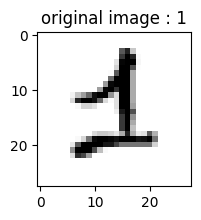

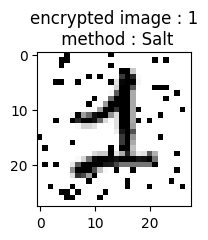

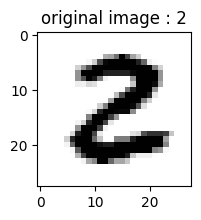

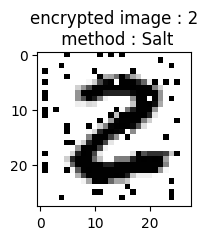

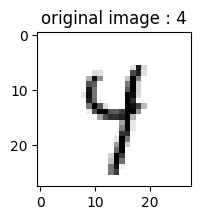

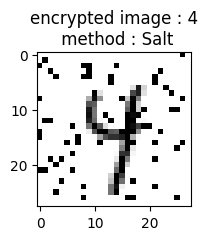

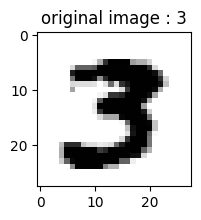

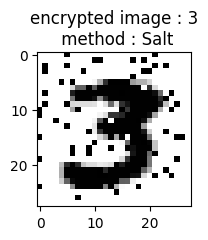

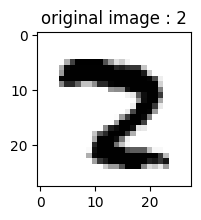

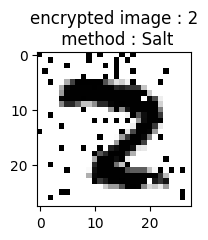

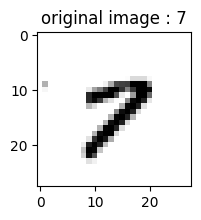

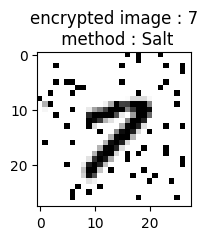

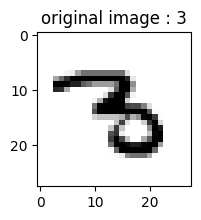

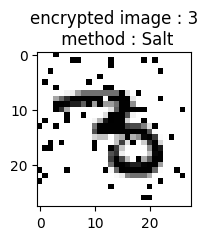

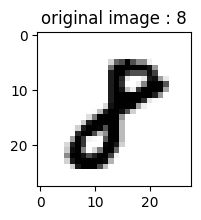

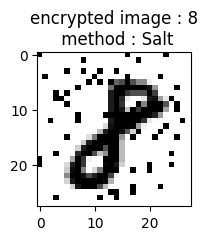

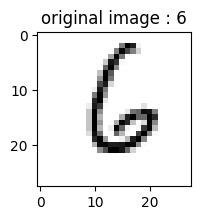

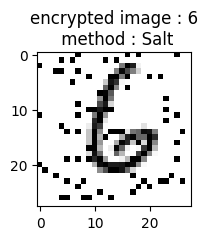

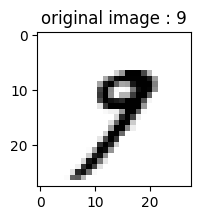

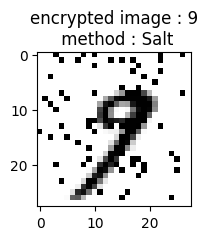

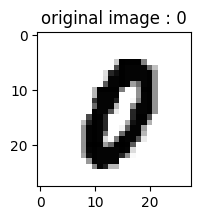

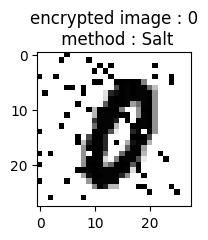

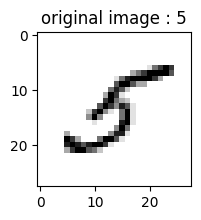

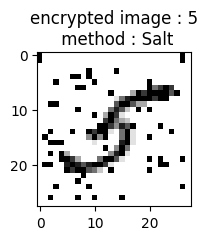

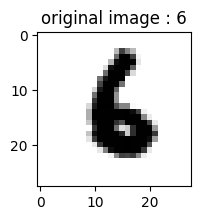

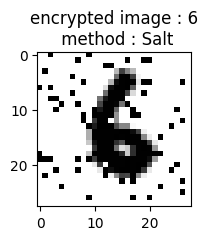

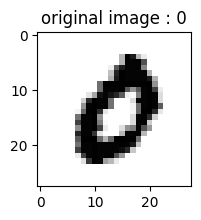

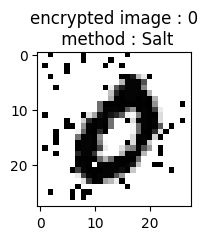

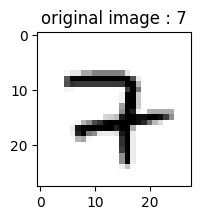

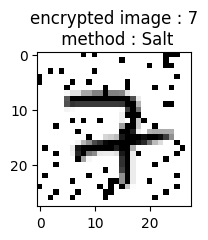

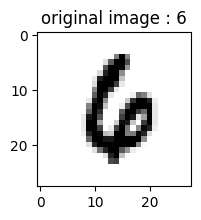

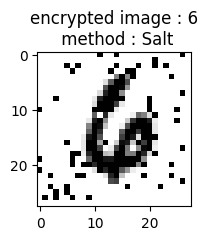

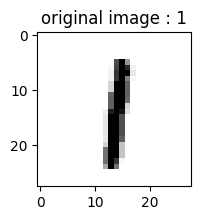

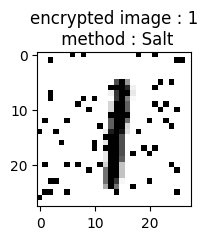

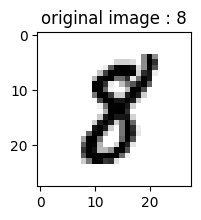

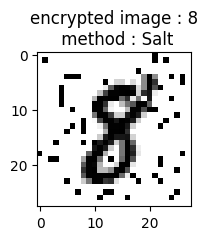

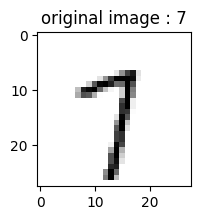

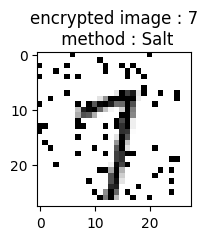

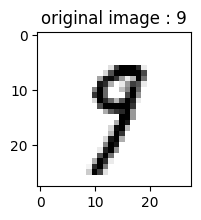

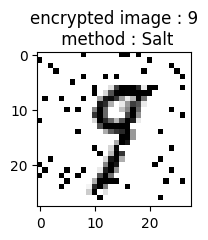

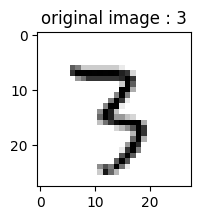

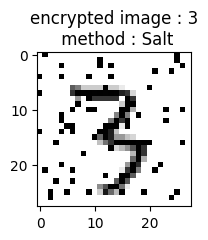

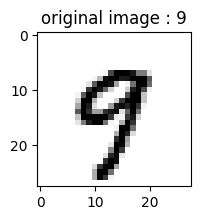

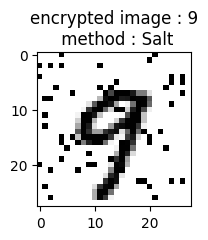

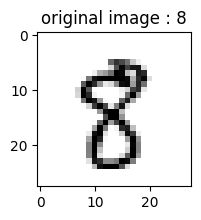

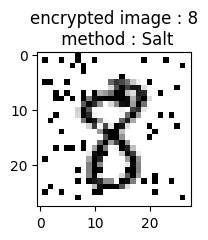

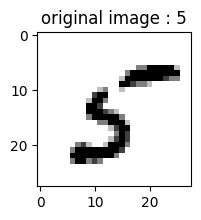

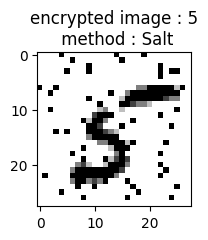

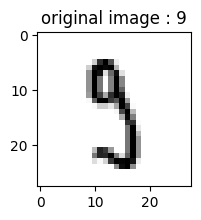

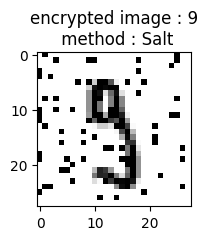

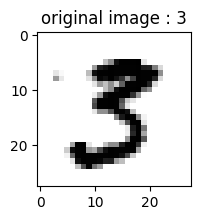

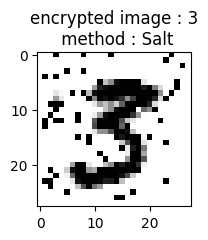

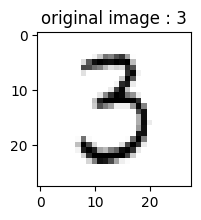

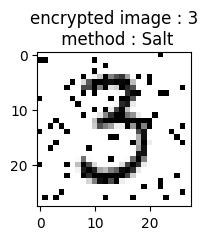

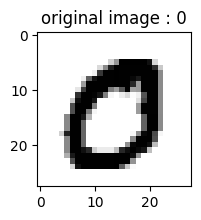

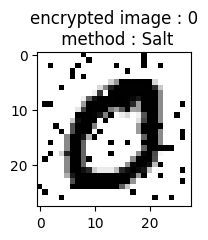

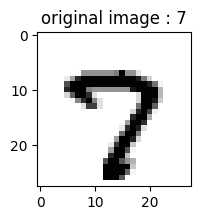

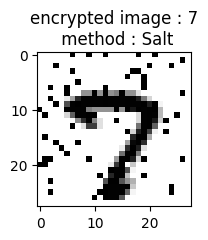

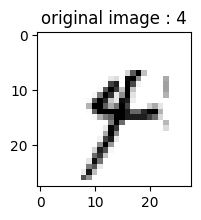

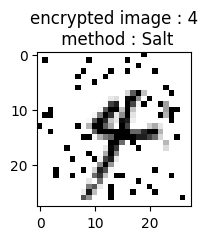

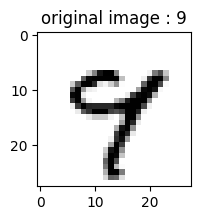

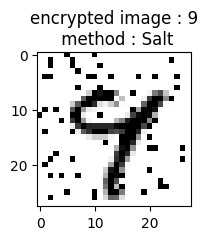

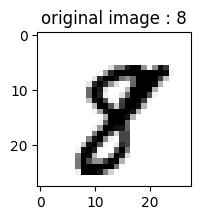

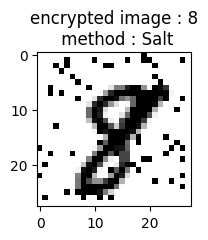

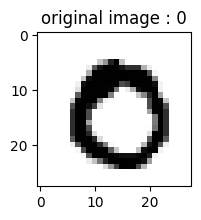

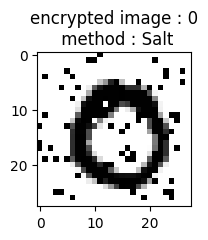

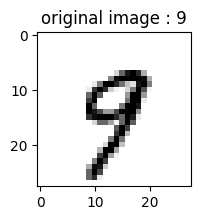

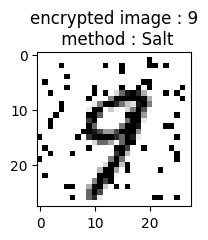

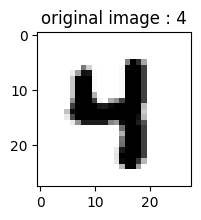

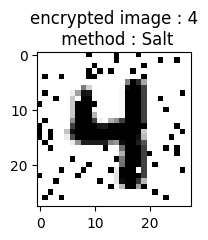

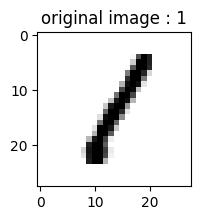

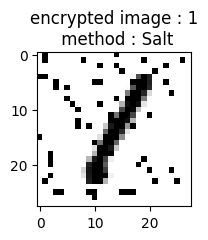

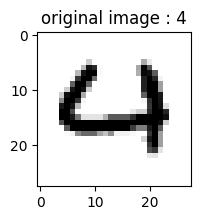

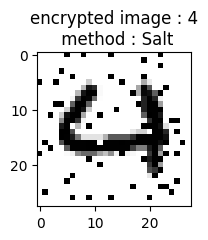

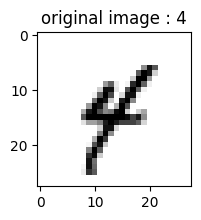

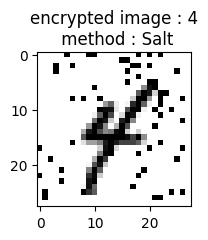

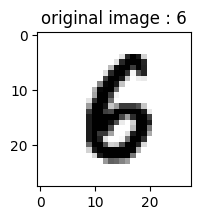

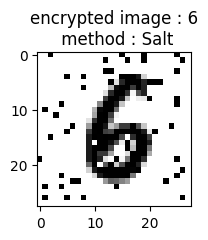

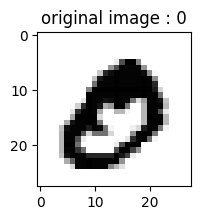

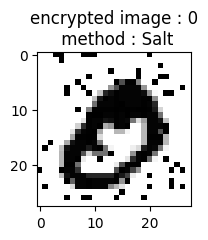

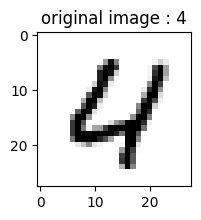

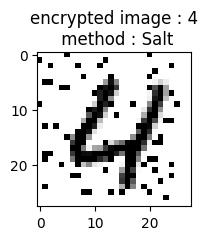

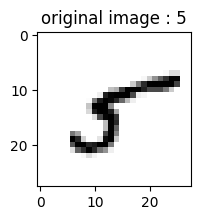

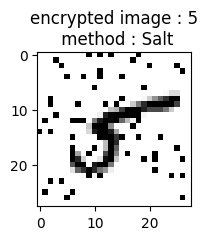

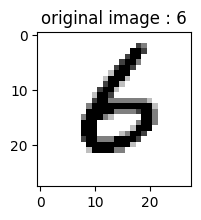

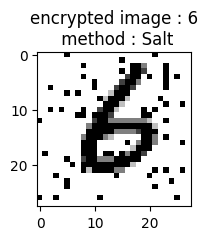

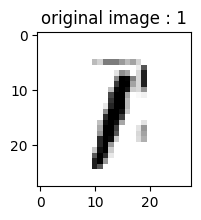

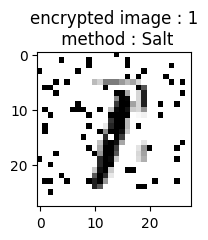

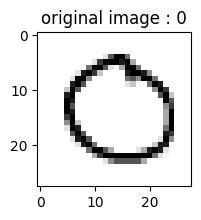

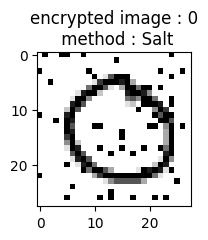

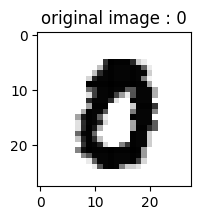

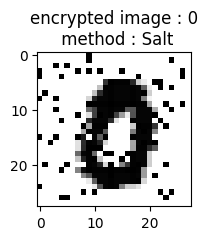

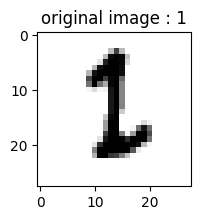

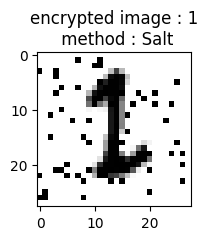

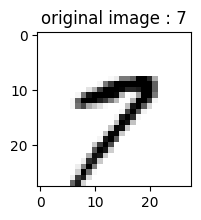

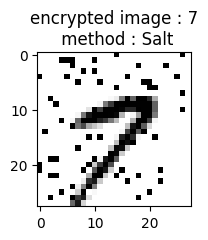

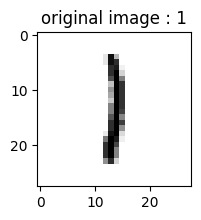

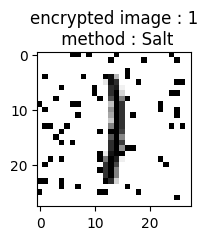

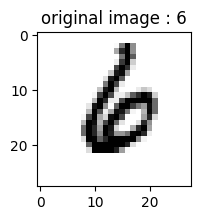

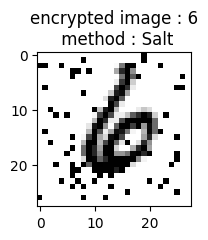

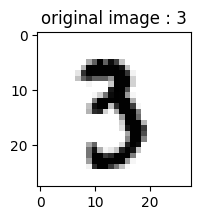

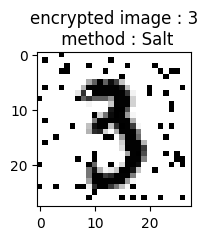

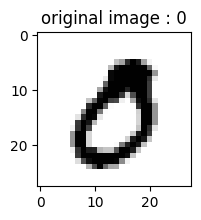

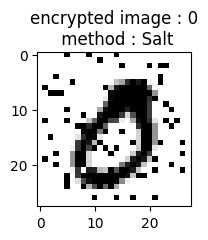

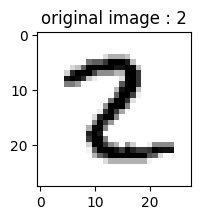

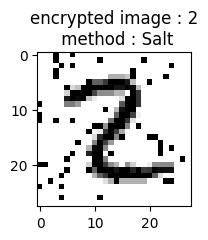

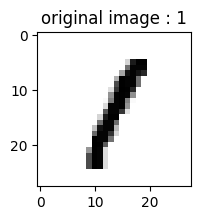

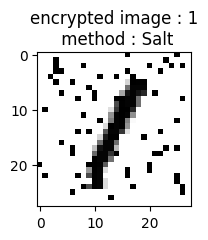

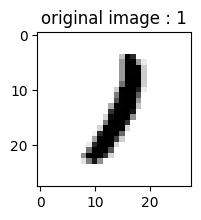

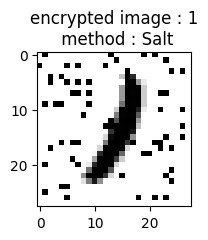

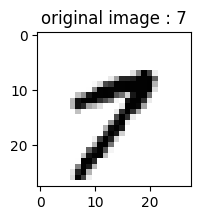

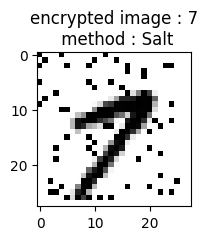

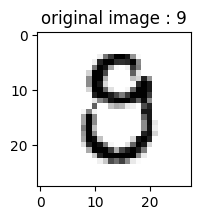

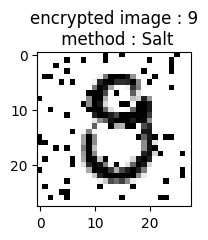

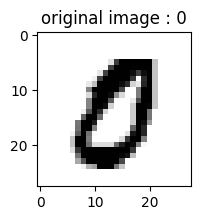

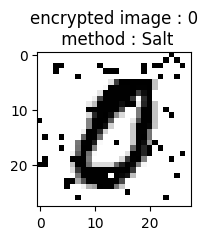

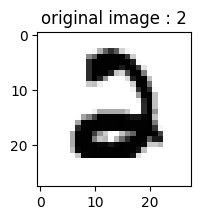

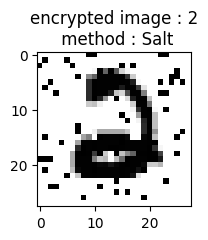

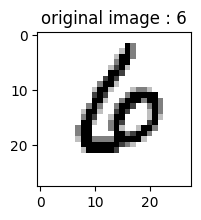

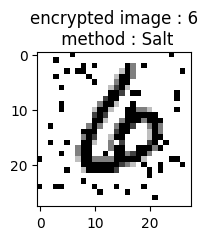

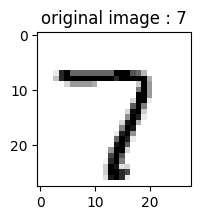

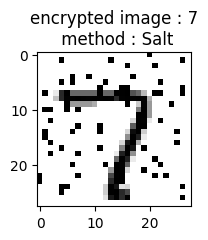

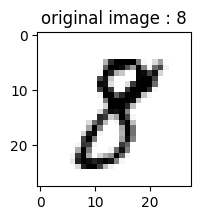

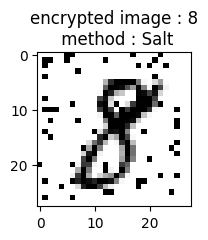

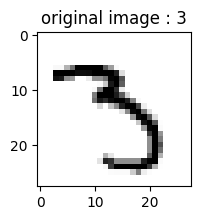

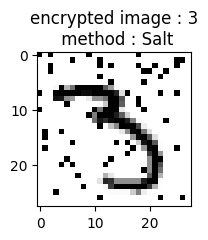

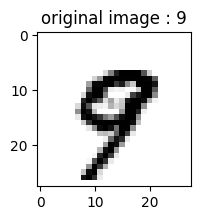

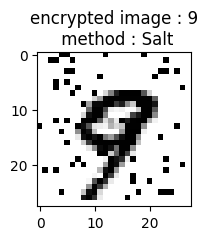

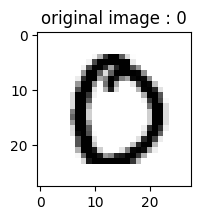

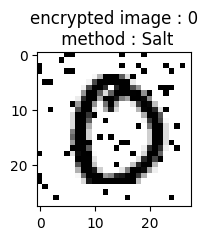

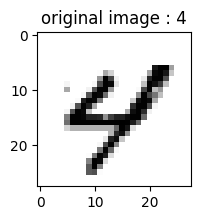

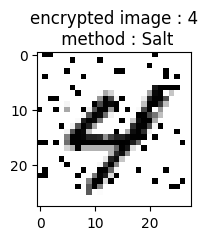

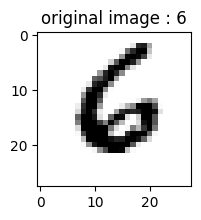

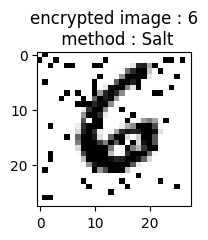

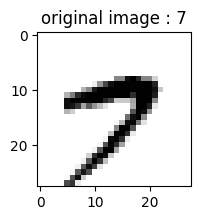

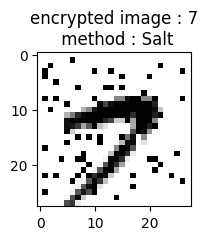

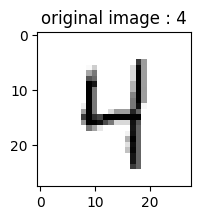

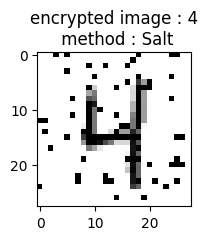

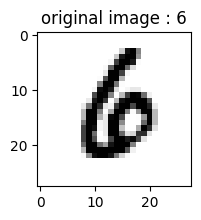

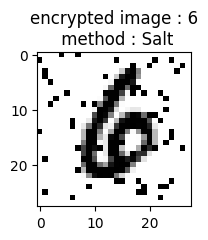

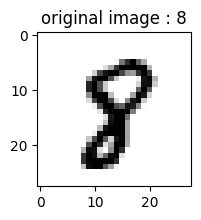

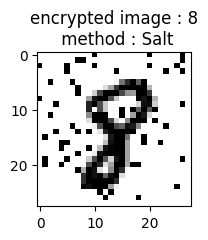

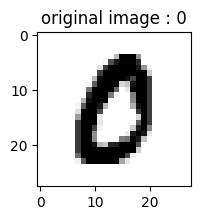

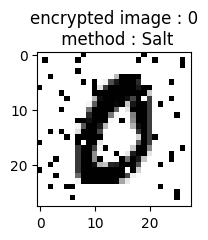

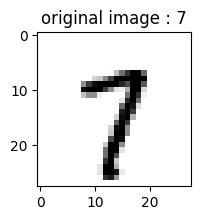

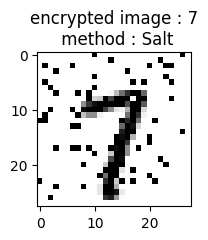

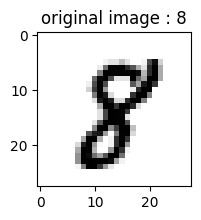

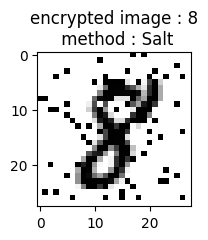

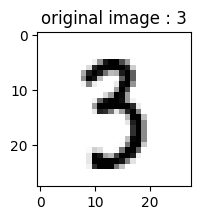

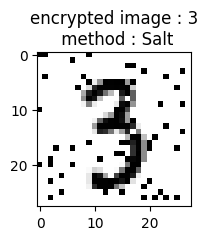

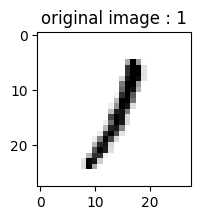

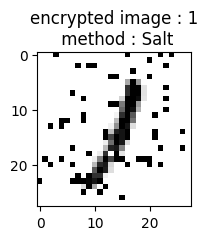

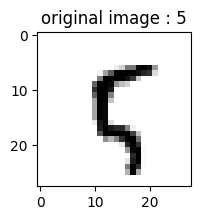

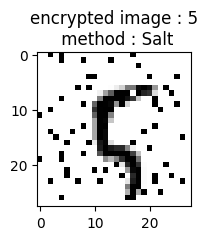

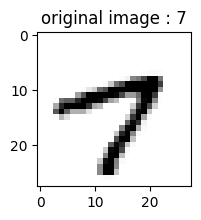

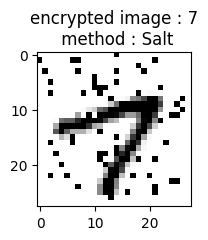

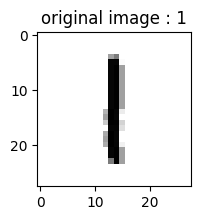

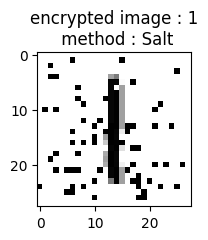

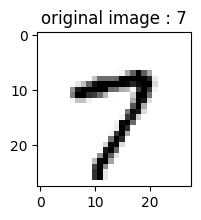

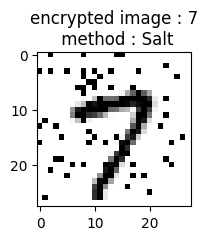

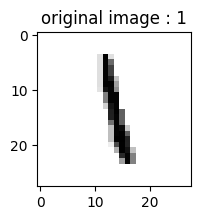

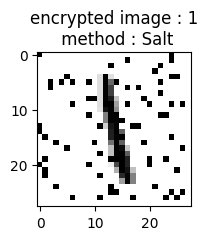

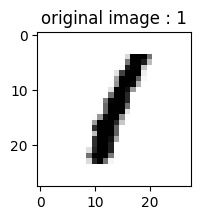

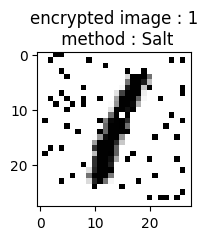

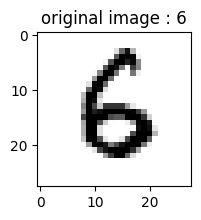

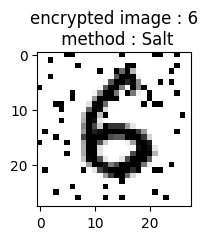

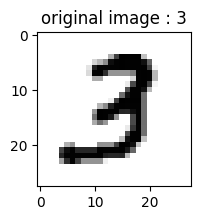

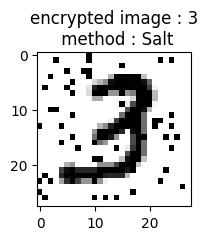

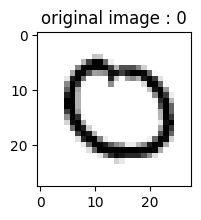

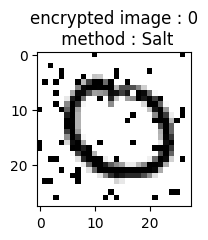

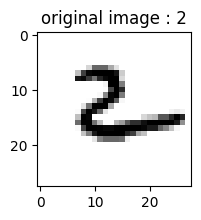

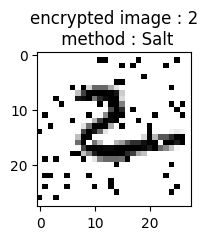

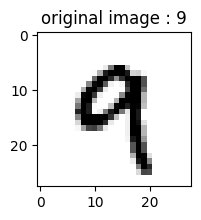

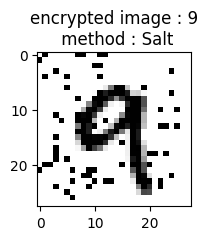

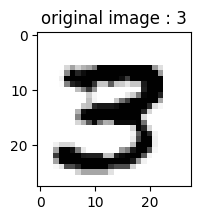

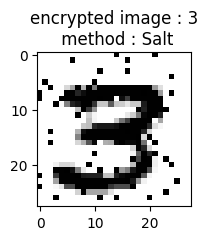

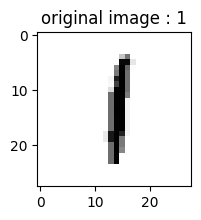

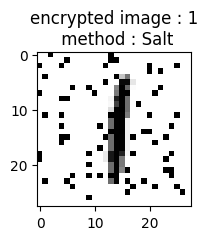

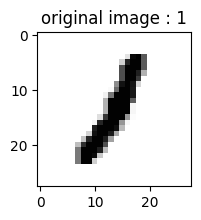

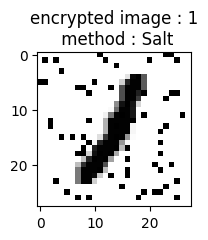

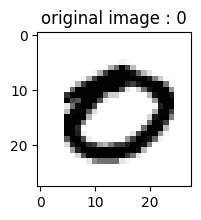

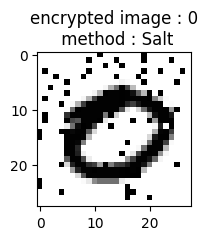

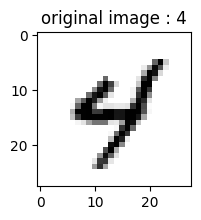

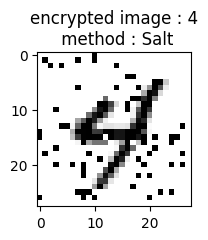

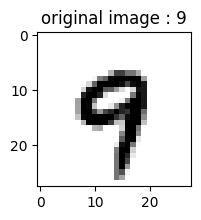

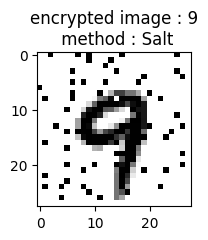

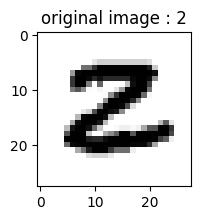

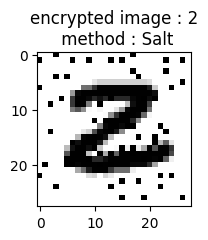

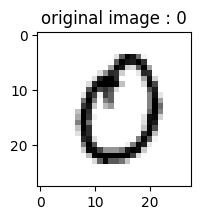

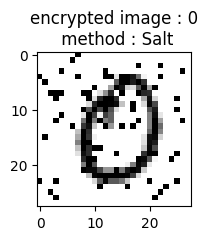

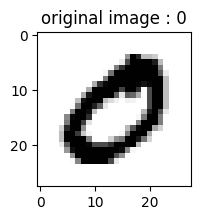

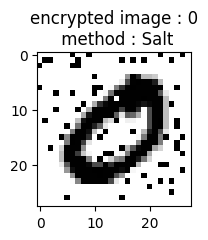

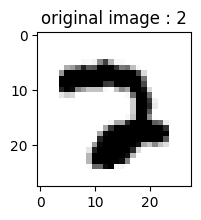

In [ ]:
for index in indexs:
    generate_encrypted_image(index)